# SVD 개요

In [1]:
import numpy as np

np.random.seed(121)
a = np.random.randn(4,4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [2]:
# SVD 행렬 분해
U, Sigma, VT = np.linalg.svd(a)

print("U:\n{}".format(U))
print()
print("Sigma:\n{}".format(Sigma))
print()
print("VT:\n{}".format(VT))

U:
[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]

Sigma:
[3.4229581  2.02287339 0.46263157 0.07935069]

VT:
[[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [3]:
#특잇값 Sigma를 대각행렬로 변환
Sigma_mat = np.diag(Sigma)
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [4]:
a
#원본행렬

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [5]:
# U, Sigma_mat, VT를 이용해 다시 조합
a_ = U @ Sigma_mat @ VT
a_ 
#조합된 행렬 -> 원본행렬 잘 표현

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
# U, Sigma : 기저벡터를 만들어 줌
# 차원축소 -> 원본 데이터를 2차원으로도 잘 설명
# VT : feature에 대한 최종적인 원복(기저벡터를 다시 M차원으로 늘려줌)을 담당

In [7]:
# truncated Sigma_mat 
# 설명력이 높은 특잇값이 상위 2개 -> 2개 사용
Sigma_truncated = np.diag(Sigma[:2])
Sigma_truncated

array([[3.4229581 , 0.        ],
       [0.        , 2.02287339]])

In [9]:
# truncated U : 잠재변수(Sigma 특잇값)에 대응되는 기저벡터 얻어내기
U_trucated = U[:, :2]
U_trucated

array([[-0.07913928, -0.31822729],
       [ 0.38294523,  0.78655287],
       [ 0.65640669,  0.02243181],
       [ 0.64515128, -0.52873697]])

In [10]:
# truncated VT : 원래 데이터를 복구하기 위해서 2개의 벡터만 사용
VT_truncated = VT[:2]
VT_truncated

array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
       [-0.20019867,  0.56209596,  0.37041464,  0.71187191]])

In [11]:
# 2개의 잠재변수만 이용하여 복구
a_truncated = U_trucated @ Sigma_truncated @ VT_truncated
print(a_truncated)

[[ 0.11776606 -0.4224323  -0.45148469 -0.3026849 ]
 [-0.26478267  1.18754777  1.62022235  0.37986869]
 [ 0.08305338  0.52807808  1.78380053 -1.25805288]
 [ 0.30468393 -0.10724542  1.34051007 -2.02962493]]


In [12]:
a
#원본과 비교
#원본과 큰 차이는 없음 , 원래 데이터를 최대한 반영

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [13]:
# 데이터가 선형 종속인 경우
# 원본데이터가 플랭크가 아닌 경우
a[2] = a[0]+a[1]
a[3] = a[0]

a
#rank(a)=2 
#의미가 있는 잠재벡터는 2개이다.

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [15]:
U, Sigma, VT = np.linalg.svd(a)
print(Sigma)
print(np.round(Sigma, 3))
#rank(a)=2 이기 때문에 뒤 2개는 쓸모 없는 잠재의미 갖음

[2.66335286e+00 8.07035060e-01 1.82933987e-16 4.23262754e-17]
[2.663 0.807 0.    0.   ]


사이파이를 이용한 특이분해

In [16]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd #넘파이의 svd와 같은 기능

np.random.seed(121)

In [19]:
matrix = np.random.random((6,6))
print(matrix)#원본행렬

[[0.76498135 0.79895355 0.9550434  0.28564054 0.80666111 0.49432353]
 [0.78515113 0.67349808 0.05678929 0.48045629 0.36700794 0.36512671]
 [0.71034433 0.97431394 0.7723137  0.77368506 0.79680433 0.27121346]
 [0.06135076 0.96502941 0.33356589 0.41690705 0.17875698 0.27123351]
 [0.24289132 0.73435278 0.02714892 0.10517129 0.98072348 0.37634908]
 [0.36239789 0.49906641 0.00262856 0.50954927 0.42096537 0.68107251]]


In [20]:
# full_matrices=False -> compact SVD 수행
U, Sigma, VT = svd(matrix, full_matrices=False)
print(U.shape, Sigma.shape, VT.shape)

(6, 6) (6,) (6, 6)


In [21]:
np.round(Sigma, 3 )
#3.256 여기가 설명력 제일 높다

array([3.256, 0.809, 0.698, 0.625, 0.378, 0.29 ])

In [22]:
#svds : truncated svd를 손쉽게 수행
num_components = 4

U_truncated, Sigma_truncated, VT_truncated = svds(matrix, k = num_components)
U_truncated.shape, Sigma_truncated.shape, VT_truncated.shape

((6, 4), (4,), (4, 6))

# sklearn에서 Truncated SVD

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [24]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris.data)

iris_tsvd = tsvd.transform(iris.data)
iris_tsvd.shape

(150, 2)

In [27]:
import pandas as pd
iris_tsvd_df = pd.DataFrame(data=iris_tsvd, columns=['component_1', 'component_2'])

iris_tsvd_df['target'] = iris.target
iris_tsvd_df.head()

,component_1,component_2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


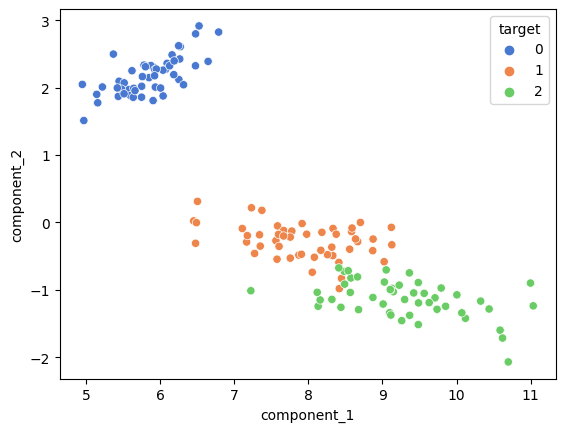

In [28]:
sns.scatterplot(x='component_1', y='component_2', hue='target', palette = 'muted', data=iris_tsvd_df)
plt.show()

In [ ]:
# pca : 공분산 행렬을 찾는데 목적이 있다.
# svd : 잠재요소를 찾아내는데 목적이 있다.
